# Lab Assignment 9:

# Write a python program to implement PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#let's start by importing data set using numpy
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#loading features and converting to a matrix X
newdata = data.values
X = newdata[:, 1:5]
print(X.shape)

(150, 4)


In [4]:
#standarizing or normalizing data on scale of mean = 0 and varience =1
n = X.shape[0]
x0 = X[:,0]
x1 = X[:,1]
x2 = X[:,2]
x3 = X[:,3]

x0_norm = np.array([])
x1_norm = np.array([])
x2_norm = np.array([])
x3_norm = np.array([])

xtemp0 = 0
xtemp1 = 0
xtemp2 = 0
xtemp3 = 0
for i in range(X.shape[0]):
    xtemp0 = (x0[i]-np.mean(x0))/np.std(x0)
    xtemp1 = (x1[i]-np.mean(x1))/np.std(x1)
    xtemp2 = (x2[i]-np.mean(x2))/np.std(x2)
    xtemp3 = (x3[i]-np.mean(x3))/np.std(x3)
    x0_norm = np.append(x0_norm, xtemp0)
    x1_norm = np.append(x1_norm, xtemp1)
    x2_norm = np.append(x2_norm, xtemp2)
    x3_norm = np.append(x3_norm, xtemp3)
    xtemp0 = 0
    xtemp1 = 0
    xtemp2 = 0
    xtemp3 = 0


x0 = x0_norm.reshape(n, 1)
x1 = x1_norm.reshape(n, 1)
x2 = x2_norm.reshape(n, 1)
x3 = x3_norm.reshape(n, 1)

Z = np.hstack((x0, x1, x2, x3))
print('------------------------X Matrix---------------------------- \n')
print(Z)

------------------------X Matrix---------------------------- 

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]

In [5]:
# calculating covarience matrix 
n = Z.shape[0]
cov_matrix = ((Z.T).dot(Z))/n
print(cov_matrix)

[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


In [6]:
#calcuating eigen values and eigen vectors using numpy
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print('Eigen Values :', eigen_values)
print('Eigen vectors:\n', eigen_vectors)

Eigen Values : [2.91081808 0.92122093 0.14735328 0.02060771]
Eigen vectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [7]:
# Now diagonalise our (X.T)X matrix  
eign_vec_transpose = eigen_vectors.T
Z_transpose_Z = (Z.T).dot(Z)
diagonalise = eign_vec_transpose.dot(Z_transpose_Z).dot(eigen_vectors)
print(diagonalise)

[[ 4.36622713e+02 -2.84217094e-14  0.00000000e+00  0.00000000e+00]
 [-3.19744231e-14  1.38183140e+02 -4.26325641e-14 -5.32907052e-15]
 [ 1.24344979e-14 -4.35207426e-14  2.21029917e+01  7.99360578e-15]
 [ 7.54951657e-15 -9.99200722e-16  2.99760217e-15  3.09115609e+00]]


WE can see in diagonalise matrix Z_transpose_Z that all other elements other then diagonal elements are nearly 0 ar tending to zero which can be assumed to be 0 . so This matriix is a diagonalised matrix PDP^-1


In [8]:
#sorting eigen value from smallest to largest in order to sort vector which covers maximum varience
sorted_eigen_values = sorted(eigen_values, reverse = True)
print('-------------------Shorted eigen values in descending----------------------')
print(sorted_eigen_values)

-------------------Shorted eigen values in descending----------------------
[2.910818083752051, 0.9212209307072247, 0.14735327830509506, 0.020607707235624887]


1. Now according to eigen value rearrange columns of eigen vectors 
2. we can see our eigen values had not changed ie as same as before so we will not change any thing in eigen vector 
3. but in case after eigen values being sorted changes its position accordinlgly we will interchange or replace our eigen vectore associated with eigen values

In [9]:
# so our P* is shorted eigen vector
P_star = eigen_vectors

In [10]:
# now aur z* or sorted standarized X is 
Z_star = Z.dot(P_star)
print(Z_star)

[[-2.26454173e+00 -5.05703903e-01 -1.21943348e-01  2.30733235e-02]
 [-2.08642550e+00  6.55404729e-01 -2.27250832e-01  1.03208244e-01]
 [-2.36795045e+00  3.18477311e-01  5.14796236e-02  2.78252250e-02]
 [-2.30419716e+00  5.75367713e-01  9.88604444e-02 -6.63114622e-02]
 [-2.38877749e+00 -6.74767397e-01  2.14278490e-02 -3.73972870e-02]
 [-2.07053681e+00 -1.51854856e+00  3.06842583e-02  4.39877494e-03]
 [-2.44571134e+00 -7.45626750e-02  3.42197636e-01 -3.80965668e-02]
 [-2.23384186e+00 -2.47613932e-01 -8.25744645e-02 -2.55051623e-02]
 [-2.34195768e+00  1.09514636e+00  1.53562399e-01 -2.67938291e-02]
 [-2.18867576e+00  4.48629048e-01 -2.46559522e-01 -3.99073035e-02]
 [-2.16348656e+00 -1.07059558e+00 -2.64009373e-01  1.53011377e-02]
 [-2.32737775e+00 -1.58587455e-01  1.00165616e-01 -1.34554258e-01]
 [-2.22408272e+00  7.09118158e-01 -2.23214514e-01  2.63061382e-03]
 [-2.63971626e+00  9.38281982e-01  1.89570030e-01 -1.94220183e-02]
 [-2.19229151e+00 -1.88997851e+00 -4.69480095e-01  1.92782042e

In [14]:
# Now we go for dimension reduction by varience capturing technique 
# first we will calculate varience of each principal component or eigen vector
# sum of each eigen value
total = sum(sorted_eigen_values)
varience_exp = np.array([])
for i in range(len(sorted_eigen_values)):
    varience_exp = np.append(varience_exp, (sorted_eigen_values[i]/total)*100)

# lets calculate cumulative varience for each component
cumulative_varience = np.cumsum(varience_exp)

print('-----------------Varience for each component--------------')
print(varience_exp)
print()
print('-----------------cumulative Varience for each component--------------')
print(cumulative_varience)

-----------------Varience for each component--------------
[72.77045209 23.03052327  3.68383196  0.51519268]

-----------------cumulative Varience for each component--------------
[ 72.77045209  95.80097536  99.48480732 100.        ]


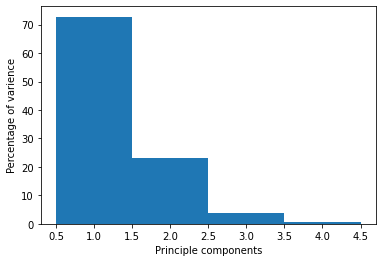

In [15]:
#lets's plot a bar plot for cumulative varience and varience of each componenet
x = [1, 2, 3, 4]
plt.bar(x,varience_exp,width=1)
plt.xlabel('Principle components')
plt.ylabel('Percentage of varience')
plt.title('') 
plt.show()

Here , we can see that first two components cover most of the varience of our data so we can reduce our dimensions to 2 

In [16]:
# so our dimension reduced matrix is W
m = Z.shape[1]
W = np.hstack((P_star[0].reshape(m, 1), P_star[1].reshape(m, 1)))
print(W)

[[ 0.52237162 -0.26335492]
 [-0.37231836 -0.92555649]
 [-0.72101681  0.24203288]
 [ 0.26199559 -0.12413481]]
